In [1]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

from scipy import stats

from sklearn.metrics import (
    f1_score, precision_score, recall_score, accuracy_score
)
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt

In [2]:
fileloc='InputData/'

In [3]:
print('1. Apply Rank-Sum test and find important features for every project.')
print ("Important Features for each of 56 files-\n")
for j in range(1,57):
    fname=fileloc+str(j)+'.csv'
    print("Processing file - "+str(j)+'.csv')
    data=np.genfromtxt(fname, delimiter=',')
    p=np.zeros((np.shape(data)[1]))
    bugs=data[:,-1]
    ino=np.where(bugs==0)
    in1=np.where(bugs==1)
    for i in range(0,np.shape(data)[1]-1):
        f=data[:,i]
        f0=f[ino[0]]
        f1=f[in1[0]]
        a=stats.ranksums(f0,f1)
        p[i]=a.pvalue
    in1=np.where(p<=0.05)
    datan=data[:,in1[0]]
    fname=fileloc+str(56+j)+'.csv'
    np.savetxt(fname, datan, delimiter=',', fmt='%f')
    print (in1)


1. Apply Rank-Sum test and find important features for every project.
Important Features for each of 56 files-

Processing file - 1.csv
(array([ 0,  3,  4,  5,  6,  7,  8, 10, 14, 17, 18, 19, 20]),)
Processing file - 2.csv
(array([ 3,  7, 20]),)
Processing file - 3.csv
(array([ 0,  1,  3,  4,  5,  7,  8, 10, 12, 14, 15, 17, 18, 20]),)
Processing file - 4.csv
(array([ 0,  3,  4,  5,  7,  8, 10, 11, 12, 13, 14, 17, 18, 19, 20]),)
Processing file - 5.csv
(array([ 0,  3,  4,  5,  6,  7,  8, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20]),)
Processing file - 6.csv
(array([ 0,  3,  4,  5,  7,  8, 10, 12, 14, 17, 20]),)
Processing file - 7.csv
(array([ 0,  3,  4,  5,  6,  7, 10, 12, 14, 17, 18, 19, 20]),)
Processing file - 8.csv
(array([ 0,  3,  4,  5,  8, 14, 19, 20]),)
Processing file - 9.csv
(array([ 0,  3,  4,  5,  6,  8, 10, 18, 19, 20]),)
Processing file - 10.csv
(array([ 0,  1,  3,  4,  5,  6,  7,  8, 10, 12, 14, 15, 16, 17, 18, 19, 20]),)
Processing file - 11.csv
(array([ 0,  2,  3,  4,  5, 

In [4]:

print('2. Apply Decision tree, Naïve Bayes, K-NN, and Bagging Classifier on above data and original data.')

def model1(trdata, tract, tsdata):
    model=DecisionTreeClassifier(criterion='gini')
    model.fit(trdata, tract)
    ypred=model.predict(tsdata)
    return ypred
     
def model2(trdata, tract, tsdata):
    model=DecisionTreeClassifier(criterion='entropy')
    model.fit(trdata, tract)
    ypred=model.predict(tsdata)
    return ypred

def model3(trdata, tract, tsdata):
    model=BernoulliNB()
    model.fit(trdata, tract)
    ypred=model.predict(tsdata)
    return ypred

def model4(trdata, tract, tsdata):
    model=GaussianNB( )
    model.fit(trdata, tract)
    ypred=model.predict(tsdata)
    return ypred
     
def model5(trdata, tract, tsdata):
    model=KNeighborsClassifier()
    model.fit(trdata, tract)
    ypred=model.predict(tsdata)
    return ypred
     
def model6(trdata, tract, tsdata):
    model=BaggingClassifier(KNeighborsClassifier(),n_estimators=10).fit(trdata, tract)
    model.fit(trdata, tract)
    ypred=model.predict(tsdata)
    return ypred
     
def model7(trdata, tract, tsdata):
    model=BaggingClassifier(DecisionTreeClassifier(),n_estimators=10).fit(trdata, tract)
    model.fit(trdata, tract)
    ypred=model.predict(tsdata)
    return ypred

def model8(trdata, tract, tsdata):
    model=AdaBoostClassifier(n_estimators=10).fit(trdata, tract)
    model.fit(trdata, tract)
    ypred=model.predict(tsdata)
    return ypred

def model9(trdata, tract, tsdata):
    model=MultinomialNB()
    model.fit(trdata, tract)
    ypred=model.predict(tsdata)
    return ypred


2. Apply Decision tree, Naïve Bayes, K-NN, and Bagging Classifier on above data and original data.


In [5]:
def normalizedata(X_train):
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    return X_train

In [6]:

print('3. Validate your model using 10-fold cross validation and compute the value of accuracy and F-Measure.')
kf = KFold (10)
acv=np.zeros((112,9))
fm=np.zeros((112,9))

for j in range(1,56*2+1):
    fname=fileloc+str(j)+'.csv'
    print("Processing file - "+str(j)+'.csv')
    data=np.genfromtxt(fname, delimiter=',')
    data[:,0:-1]=normalizedata(data[:,0:-1])
    ypred=np.zeros((np. shape(data)[0],9))
    for tr_in, ts_in in kf.split(data):
        trdata=data[tr_in, 0:-1]
        tract=data[tr_in, -1]
        tsdata=data[ts_in, 0:-1]
        tsact=data[ts_in, -1]
        ypred[ts_in,0]=model1(trdata, tract, tsdata)
        ypred[ts_in,1]=model2(trdata, tract, tsdata)
        ypred[ts_in,2]=model3(trdata, tract, tsdata)
        ypred[ts_in,3]=model4(trdata, tract, tsdata)
        ypred[ts_in,4]=model5(trdata, tract, tsdata)
        ypred[ts_in,5]=model6(trdata, tract, tsdata)
        ypred[ts_in,6]=model7(trdata, tract, tsdata)
        ypred[ts_in,7]=model8(trdata, tract, tsdata)
        ypred[ts_in,8]=model9(trdata, tract, tsdata)

    print("Computing values of Accuracy & F-Measure")
    for i in range(0,9):
        acv[j-1, i]=accuracy_score(data[:,-1], ypred[:,i])
        fm[j-1, i]=f1_score(data[:,-1],ypred[:,i])


3. Validate your model using 10-fold cross validation and compute the value of accuracy and F-Measure.
Processing file - 1.csv
Computing values of Accuracy & F-Measure
Processing file - 2.csv
Computing values of Accuracy & F-Measure
Processing file - 3.csv
Computing values of Accuracy & F-Measure
Processing file - 4.csv
Computing values of Accuracy & F-Measure
Processing file - 5.csv
Computing values of Accuracy & F-Measure
Processing file - 6.csv
Computing values of Accuracy & F-Measure
Processing file - 7.csv
Computing values of Accuracy & F-Measure
Processing file - 8.csv
Computing values of Accuracy & F-Measure
Processing file - 9.csv
Computing values of Accuracy & F-Measure
Processing file - 10.csv
Computing values of Accuracy & F-Measure
Processing file - 11.csv
Computing values of Accuracy & F-Measure
Processing file - 12.csv
Computing values of Accuracy & F-Measure
Processing file - 13.csv
Computing values of Accuracy & F-Measure
Processing file - 14.csv
Computing values of Acc

In [7]:
print(acv)
fname='OutputData/acv.csv'
np.savetxt(fname, acv, delimiter=',', fmt='%f')

[[0.744      0.72       0.832      ... 0.784      0.816      0.832     ]
 [0.67977528 0.66292135 0.71348315 ... 0.74719101 0.71910112 0.7752809 ]
 [0.84300341 0.87372014 0.81911263 ... 0.89419795 0.88395904 0.88737201]
 ...
 [0.90816327 0.90986395 0.90816327 ... 0.91836735 0.92857143 0.78911565]
 [0.68518519 0.66049383 0.69135802 ... 0.72839506 0.7654321  0.61111111]
 [0.82758621 0.82758621 0.79310345 ... 0.82758621 0.79310345 0.86206897]]


In [9]:
p=np.zeros((9,9))
for i in range(0,9):
    for j in range(0,9):
        a=stats.ranksums(acv[:,i], acv[:,j])
        p[i,j]=a.pvalue

4. Represent your results using Box-plot diagram and Hypothesis Testing.


In [10]:
print(p)

[[1.00000000e+00 8.20566684e-01 8.05368855e-01 2.68620769e-01
  1.17792129e-02 9.34665813e-03 6.80315301e-03 7.53317034e-03
  3.60832844e-02]
 [8.20566684e-01 1.00000000e+00 6.83076108e-01 2.10710950e-01
  1.73843255e-02 1.33475759e-02 1.23425982e-02 1.21640287e-02
  6.07435726e-02]
 [8.05368855e-01 6.83076108e-01 1.00000000e+00 3.22299596e-01
  1.08159671e-02 8.23187131e-03 6.95246677e-03 7.48700374e-03
  3.35986982e-02]
 [2.68620769e-01 2.10710950e-01 3.22299596e-01 1.00000000e+00
  3.53785661e-04 3.33454958e-04 3.78226303e-04 4.63138584e-04
  3.32218777e-03]
 [1.17792129e-02 1.73843255e-02 1.08159671e-02 3.53785661e-04
  1.00000000e+00 9.39186222e-01 9.84371502e-01 9.91774095e-01
  6.39737313e-01]
 [9.34665813e-03 1.33475759e-02 8.23187131e-03 3.33454958e-04
  9.39186222e-01 1.00000000e+00 9.03171501e-01 9.24433653e-01
  5.77007188e-01]
 [6.80315301e-03 1.23425982e-02 6.95246677e-03 3.78226303e-04
  9.84371502e-01 9.03171501e-01 1.00000000e+00 9.32626644e-01
  6.39737313e-01]
 [7.53

In [11]:
p1=p<=0.05
print(p1)

[[False False False False  True  True  True  True  True]
 [False False False False  True  True  True  True False]
 [False False False False  True  True  True  True  True]
 [False False False False  True  True  True  True  True]
 [ True  True  True  True False False False False False]
 [ True  True  True  True False False False False False]
 [ True  True  True  True False False False False False]
 [ True  True  True  True False False False False False]
 [ True False  True  True False False False False False]]


In [14]:
acvf=np.zeros((56*9,2))
for i in range(0,2):
    for j in range(0,56):
        acvf[9*j:9*(j+1),i]=acv[56*i+j,:]
       
print('Hypothesis Testing')
a=stats.ranksums(acvf[:,0],acvf[:,1])
print(a.pvalue)


Hypothesis Testing
0.16090755013637026


In [15]:
print(acvf)
fname='OutputData/acvf.csv'
np.savetxt(fname, acvf, delimiter=',', fmt='%f')

[[0.744      0.768     ]
 [0.72       0.736     ]
 [0.832      0.832     ]
 ...
 [0.82758621 0.82758621]
 [0.75862069 0.79310345]
 [0.75862069 0.86206897]]


4. Represent your results using Box-plot diagram and Hypothesis Testing. 


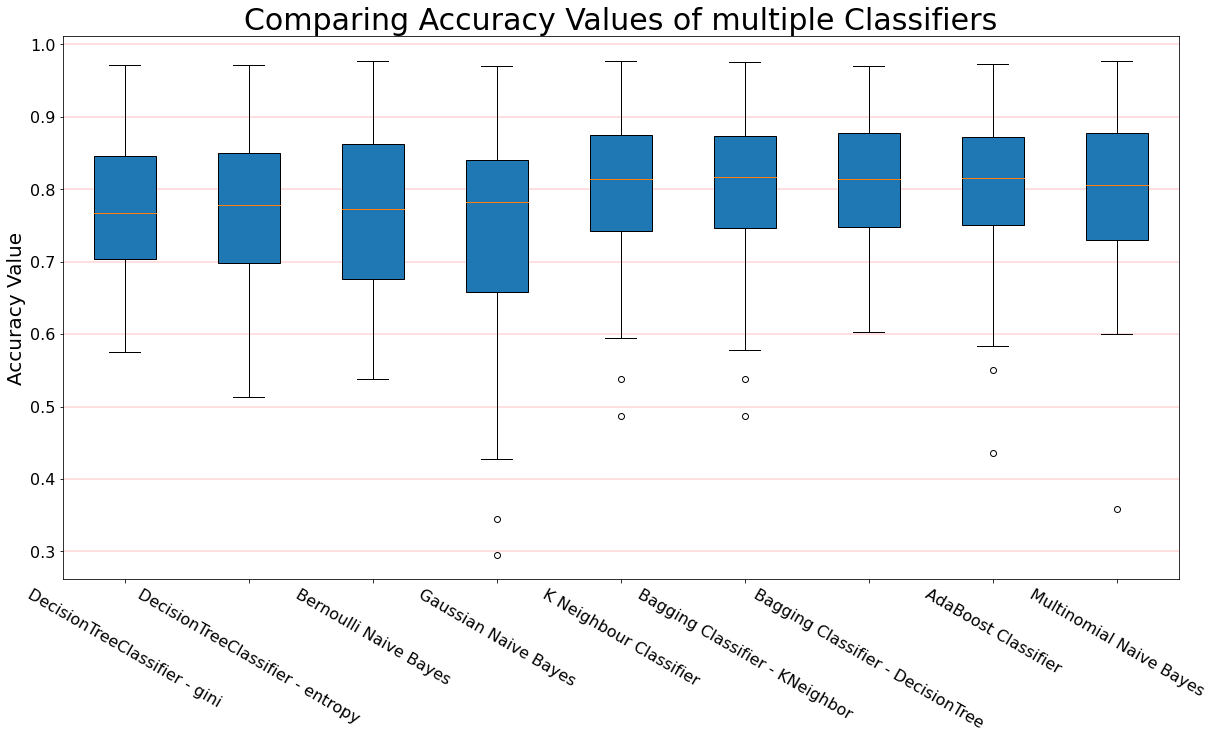

In [16]:
print('4. Represent your results using Box-plot diagram and Hypothesis Testing. ')
fig, ax = plt.subplots(figsize=(20, 10))
ax.grid(color='red', axis='y', linestyle='-', linewidth=0.25, alpha=1)
plt.rcParams["figure.autolayout"] = True
plt.boxplot(acv, vert=True, patch_artist=True)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9], ['DecisionTreeClassifier - gini', 
                                         'DecisionTreeClassifier - entropy', 'Bernoulli Naive Bayes', 
                                         'Gaussian Naive Bayes', 'K Neighbour Classifier', 'Bagging Classifier - KNeighbor',
                                         'Bagging Classifier - DecisionTree', 'AdaBoost Classifier', 
                                         'Multinomial Naive Bayes'])
plt.xticks(rotation=330, fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('Accuracy Value', fontsize=20)
plt.title('Comparing Accuracy Values of multiple Classifiers',fontsize=30)
plt.show()

4. Represent your results using Box-plot diagram and Hypothesis Testing. 


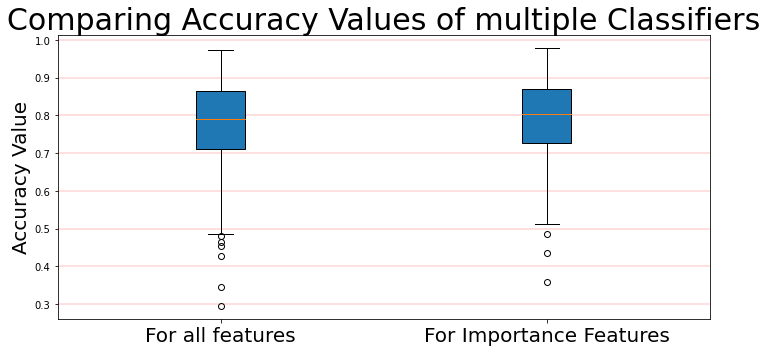

In [17]:
print('4. Represent your results using Box-plot diagram and Hypothesis Testing. ')
fig, ax = plt.subplots(figsize=(10, 5))
ax.grid(color='red', axis='y', linestyle='-', linewidth=0.25, alpha=1)
plt.rcParams["figure.autolayout"] = True
plt.boxplot(acvf, vert=True, patch_artist=True)
plt.xticks([1, 2], ['For all features', 'For Importance Features'])
plt.xticks(fontsize=20)
plt.ylabel('Accuracy Value', fontsize=20)
plt.title('Comparing Accuracy Values of multiple Classifiers',fontsize=30)
plt.show()